<a href="https://colab.research.google.com/github/Krazahra/Machine-Learning/blob/main/Google_Colab_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Kinanti Rahayu Az-Zahra

NIM : 1103210052

Kelas : TK-45-04

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Membaca dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/melb_data.csv")

# Menampilkan beberapa baris pertama dataset
print(data.head(10))

   Unnamed: 0      Suburb           Address  Rooms Type      Price Method  \
0           1  Abbotsford      85 Turner St      2    h  1480000.0      S   
1           2  Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2           4  Abbotsford      5 Charles St      3    h  1465000.0     SP   
3           5  Abbotsford  40 Federation La      3    h   850000.0     PI   
4           6  Abbotsford       55a Park St      4    h  1600000.0     VB   
5          10  Abbotsford    129 Charles St      2    h   941000.0      S   
6          11  Abbotsford      124 Yarra St      3    h  1876000.0      S   
7          14  Abbotsford     98 Charles St      2    h  1636000.0      S   
8          15  Abbotsford  217 Langridge St      3    h  1000000.0      S   
9          16  Abbotsford   18a Mollison St      2    t   745000.0      S   

  SellerG       Date  Distance  ...  Bathroom  Car  Landsize  BuildingArea  \
0  Biggin  3/12/2016       2.5  ...       1.0  1.0     202.0           NaN

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [12]:
# Drop rows
data_cleaned = data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

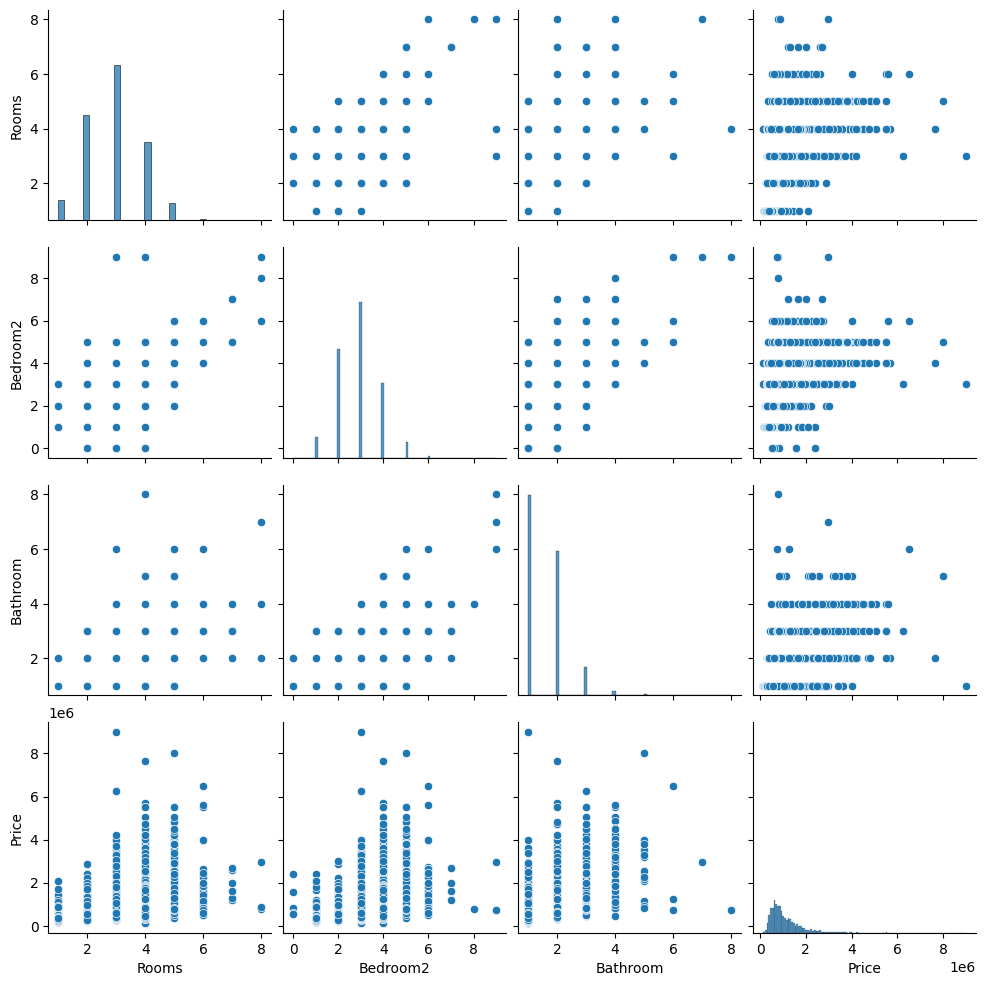

In [13]:
data.dropna(inplace=True)
selected_columns = ['Rooms', 'Bedroom2', 'Bathroom', 'Price']
data = data[selected_columns]

sns.pairplot(data)
plt.show()